In [20]:
import sys
sys.path.insert(1,"..")
import learnHeat as lh
import matplotlib.pyplot as plt
import numpy as np
import scores_table as scort

Let's analyse how the predictive capability of the Laplacian changes, we are not interested in $\Vert L_{learned}-L_{ground}\Vert_F^2$ but on $\Vert X_{learned} - X_{ground}\Vert_F^2$, as we are interested to see how exactly the pure loss changes.

In [69]:
def vec_loss(L_ground,L,tau):
    S = len(tau)
    N = L.shape[0]
    H = np.eye(N*S)
    loss = []
    D_ground = lh.D(L_ground,tau)
    edges = lh.heat_numedges(L)
    for i in range(int(edges)):
        minimum = np.max(L[L<0])
        L[L==minimum] = 0
        D = lh.D(L,tau)
        loss_i = np.linalg.norm(D@H-D_ground@H,'fro')
        loss.append(loss_i)
    return loss

In [105]:
N = 40
L_ground = lh.heat_graph_RBF(N)
tau_ground = [0.5,1,2.5,4]
X_ground = lh.create_deltas(L_ground,tau_ground)
res = lh.learn_heat(X_ground,tau0=tau_ground,alpha=0,beta=0,max_iter=50)
L = res["L"]

In [106]:
N = 40
L_ground2 = lh.heat_graph_BA(N)
tau_ground2 = [0.5,1,2.5,4]
X_ground2 = lh.create_deltas(L_ground2,tau_ground2)
res2 = lh.learn_heat(X_ground2,tau0=tau_ground,alpha=0,beta=0,max_iter=50)
L2 = res2["L"]

In [107]:
N = 40
L_ground3 = lh.heat_graph_ER(N)
tau_ground3 = [0.5,1,2.5,4]
X_ground3 = lh.create_deltas(L_ground3,tau_ground3)
res3 = lh.learn_heat(X_ground3,tau0=tau_ground,alpha=0.01,beta=0,max_iter = 50)
L3 = res3["L"]

Text(0, 0.5, 'Total loss $\\Vert D_{del}-D_{ground}\\Vert$')

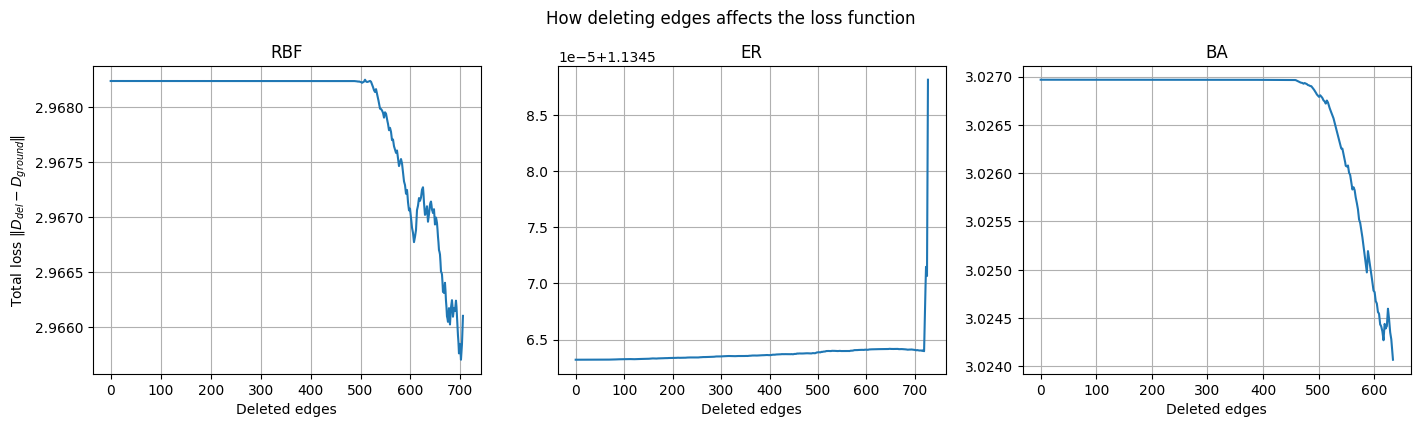

In [108]:
fig, ax = plt.subplots(1,3,figsize=(17,4))
L_grounds = [L_ground,L_ground3,L_ground2]
fig.suptitle(r"How deleting edges affects the loss function",y=1.02)
titles = ["RBF","ER","BA"]
Ls = [L,L3,L2]
for i in range(3):
    Lgr = np.copy(L_grounds[i])
    Ldel = np.copy(Ls[i])
    loss = vec_loss(Lgr,Ldel,tau_ground)
    ax[i].plot(range(len(loss)),loss)
    ax[i].set_xlabel("Deleted edges")
    ax[i].set_title(titles[i])
    ax[i].grid()
ax[0].set_ylabel(r"Total loss $\Vert D_{del}-D_{ground}\Vert$")
    